Task 1

Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
#Import dataset
sales = pd.read_csv("D:/ADESOYE'S DOCUMENTS/NTU SCHOOL WORK/AI/Project Data/sales_data_sample.csv",sep=",", encoding='Latin-1')

In [3]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

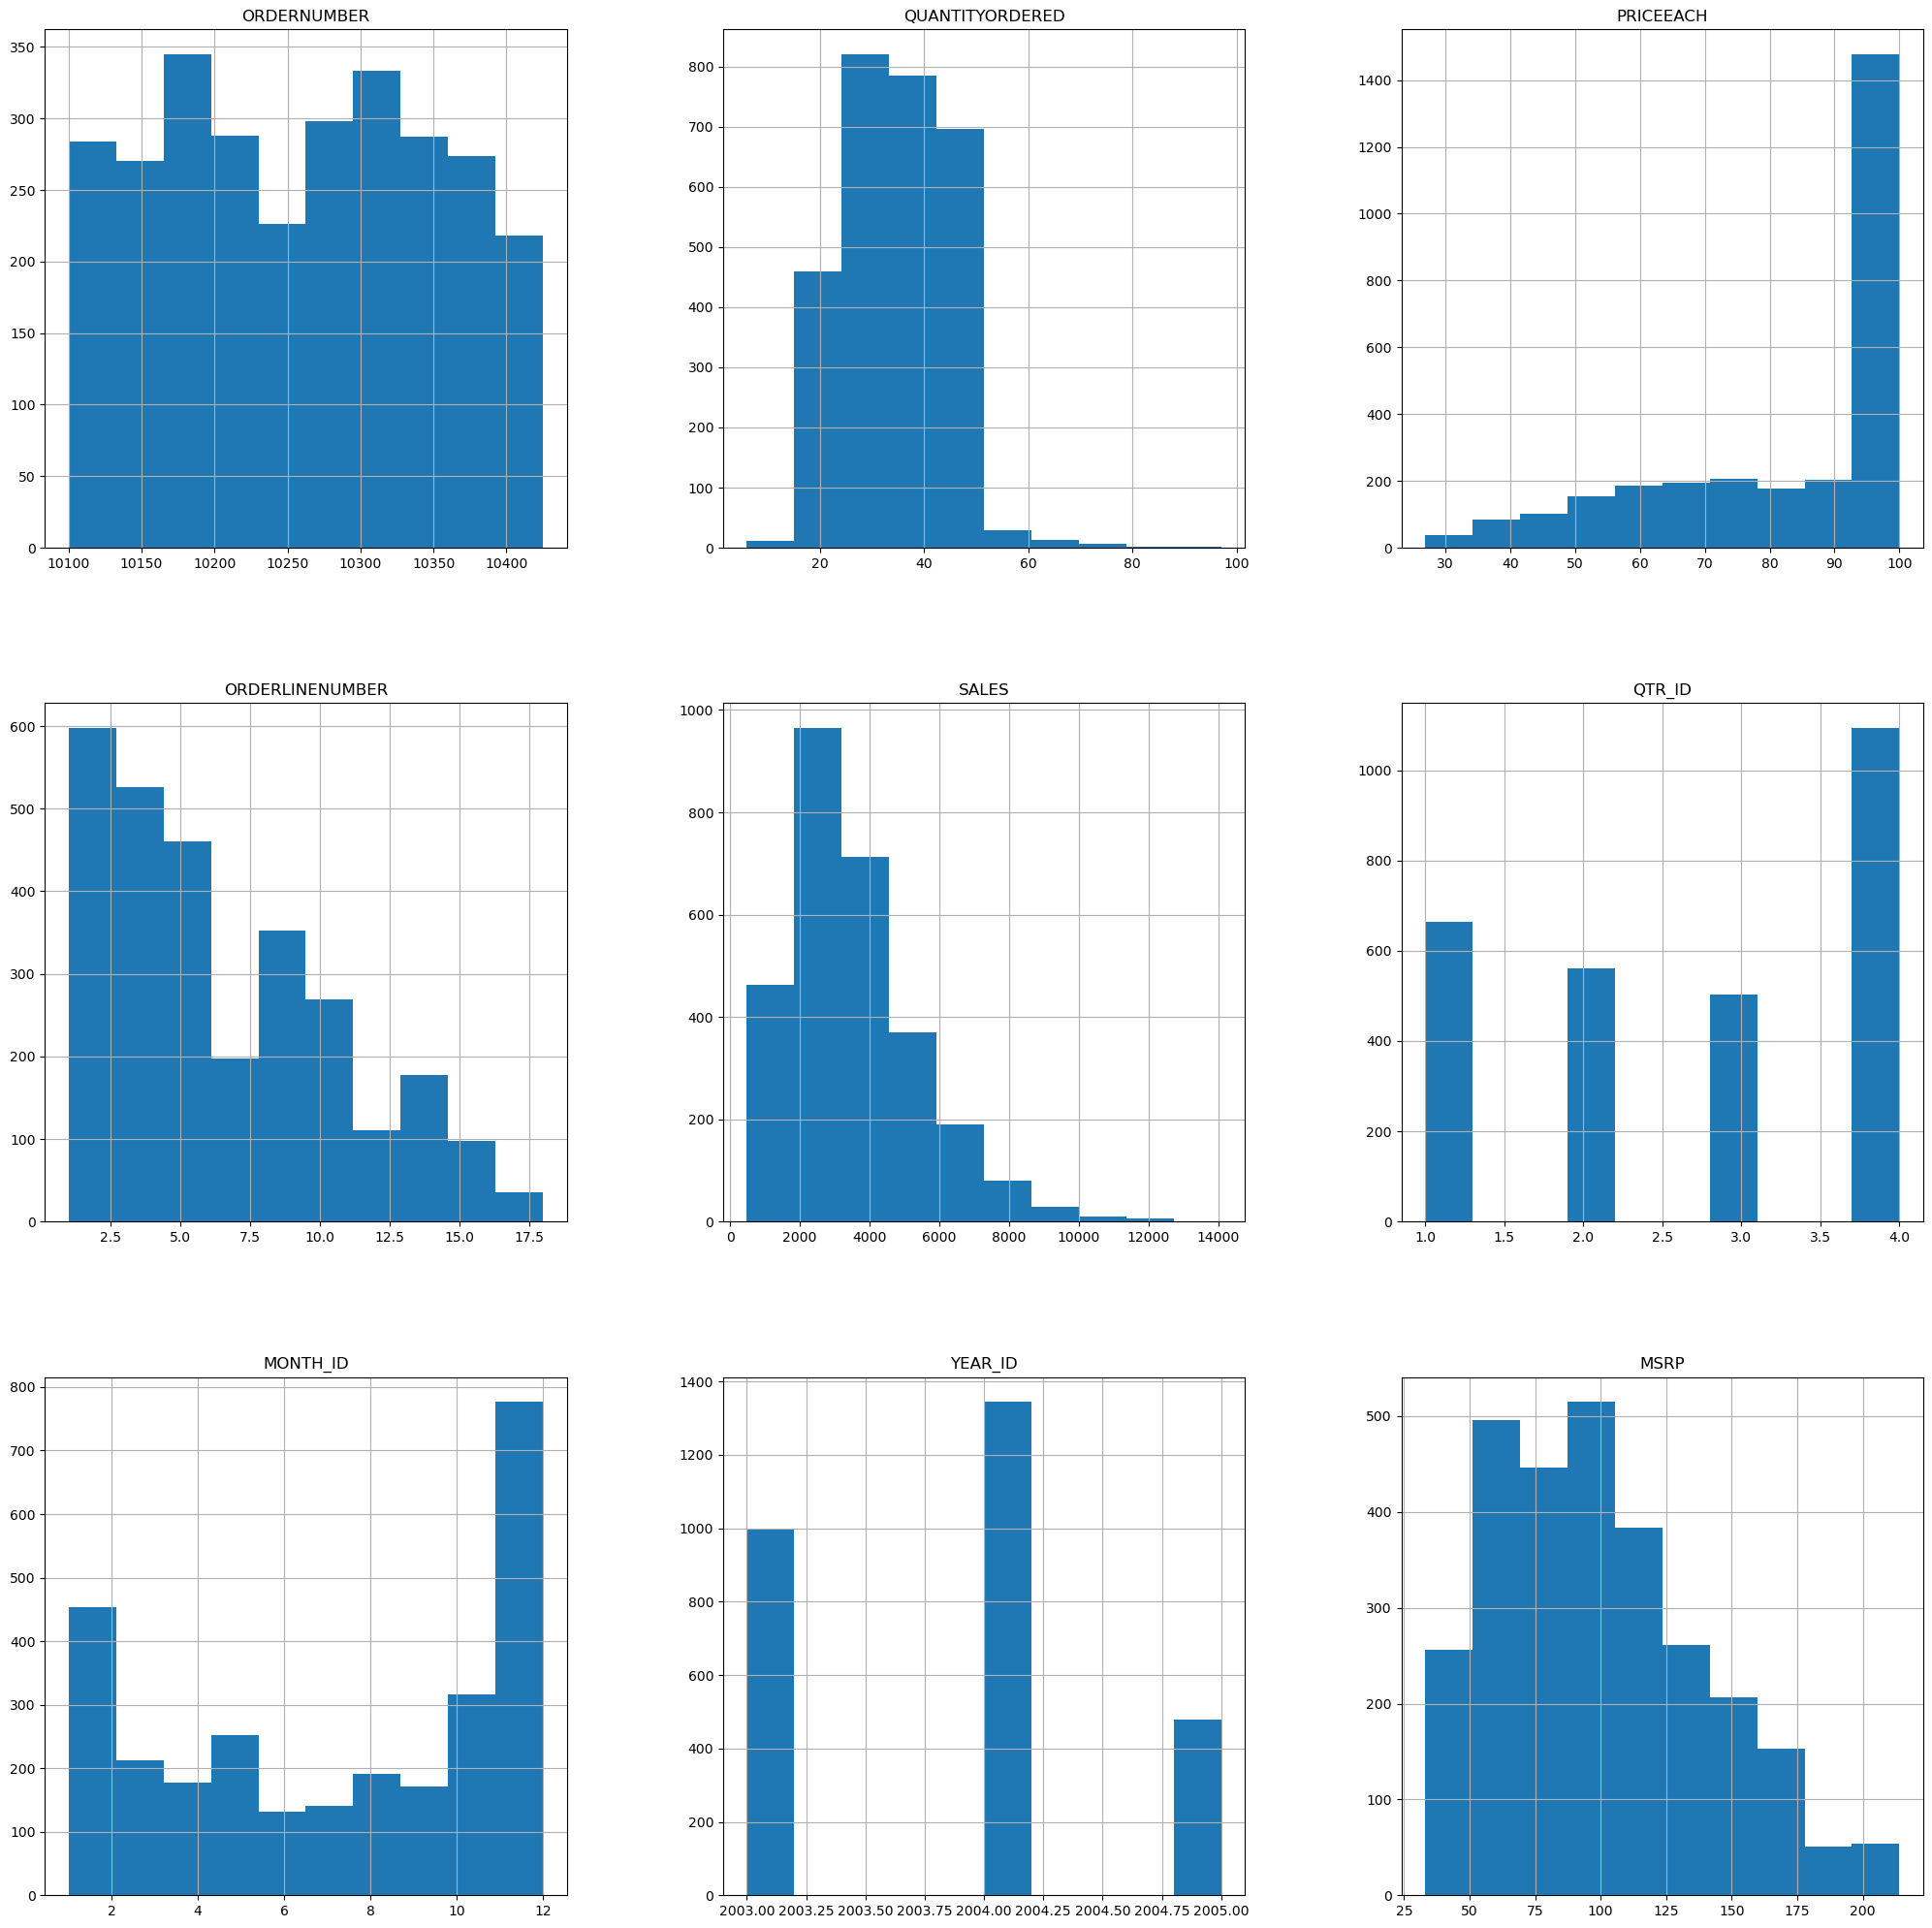

In [9]:
sales.hist(figsize = (25,25))
plt.show()

Dataset Cleaning

In [10]:
#Remove variables with no significant impact on analysis & those that will compromise customer identity.
sales_2 = sales.drop(['ORDERDATE','ADDRESSLINE1','ADDRESSLINE2','PHONE','STATE','POSTALCODE',
                      'TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','CUSTOMERNAME','CITY','PRODUCTCODE'], axis=1)

In [11]:
sales_2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,France,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,USA,Medium


In [12]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 286.8+ KB


Text(0.5, 0, 'Frequency')

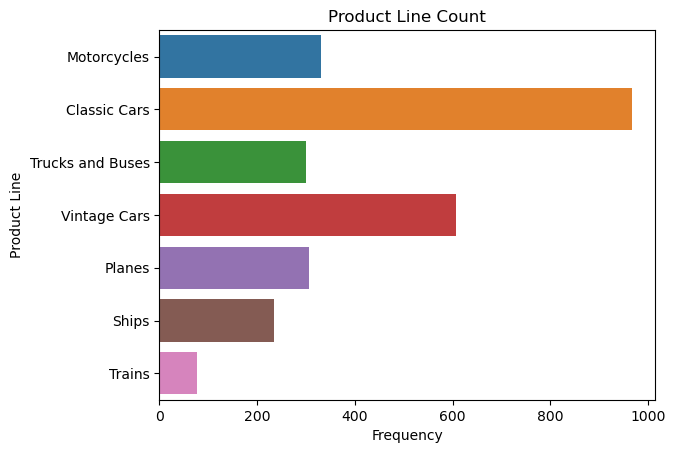

In [13]:
sns.countplot(data=sales_2,y='PRODUCTLINE');
plt.title('Product Line Count')
plt.ylabel('Product Line')
plt.xlabel('Frequency')

Text(0.5, 0, 'Sales')

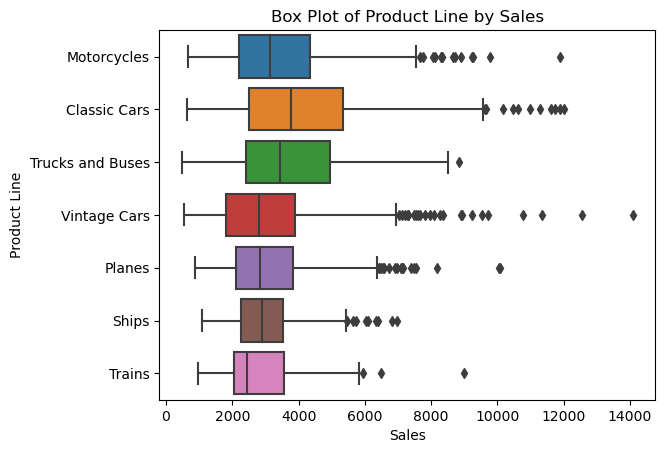

In [14]:
sns.boxplot(data=sales_2,x='SALES',y='PRODUCTLINE',);
plt.title('Box Plot of Product Line by Sales')
plt.ylabel('Product Line')
plt.xlabel('Sales')

In [15]:
sales_2a = sales_2.groupby(['YEAR_ID'])['SALES'].sum(['PRODUCTLINE']).reset_index()
sales_2a['YEAR_ID'] = sales_2a['YEAR_ID'].astype('str')

In [16]:
sales_prd = sales_2.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].sum().reset_index()
sales_prd['PRODUCTLINE'] = sales_prd['PRODUCTLINE'] + '-' + sales_prd['YEAR_ID'].astype('str')

Text(0.5, 0, 'Sales (Millions)')

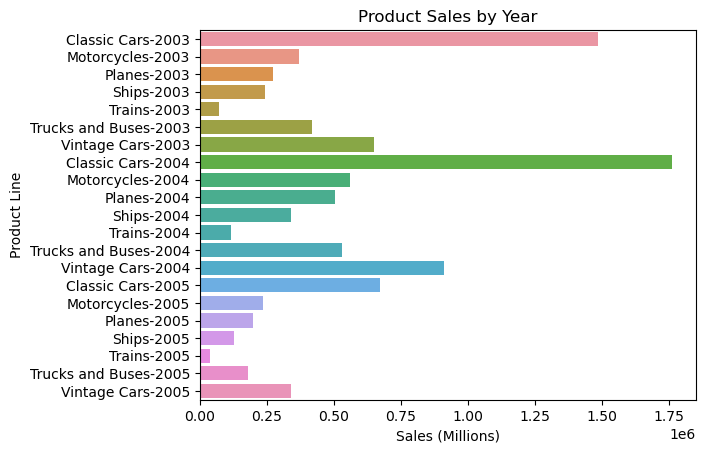

In [17]:
sns.barplot(data=sales_prd,x='SALES',y='PRODUCTLINE');
plt.title('Product Sales by Year')
plt.ylabel('Product Line')
plt.xlabel('Sales (Millions)')

In [18]:
#Rename columns
sales_2.rename(columns={'PRICEEACH': 'UNITPRICE'}, inplace=True)
sales_2.head()

,ORDERNUMBER,QUANTITYORDERED,UNITPRICE,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,France,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,USA,Medium


Label Encoding

In [19]:
#Label encoding technique adopted is to first convert object to categorical
#2nd step is to convert categorical to numerical
sales_2['COUNTRY'] = sales_2['COUNTRY'].astype('category')
sales_2['DEALSIZE'] = sales_2['DEALSIZE'].astype('category')
sales_2['PRODUCTLINE'] = sales_2['PRODUCTLINE'].astype('category')
sales_2['STATUS'] = sales_2['STATUS'].astype('category')

In [20]:
sales_2['PRODUCTLINE'] = sales_2['PRODUCTLINE'].cat.codes
sales_2['COUNTRY'] = sales_2['COUNTRY'].cat.codes
sales_2['DEALSIZE'] = sales_2['DEALSIZE'].cat.codes
sales_2['STATUS'] = sales_2['STATUS'].cat.codes
sales_2.head()

,ORDERNUMBER,QUANTITYORDERED,UNITPRICE,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,5,1,2,2003,1,95,18,2
1,10121,34,81.35,5,2765.90,5,2,5,2003,1,95,6,2
2,10134,41,94.74,2,3884.34,5,3,7,2003,1,95,6,1
3,10145,45,83.26,6,3746.70,5,3,8,2003,1,95,18,1
4,10159,49,100.00,14,5205.27,5,4,10,2003,1,95,18,1


In [21]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   UNITPRICE        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   STATUS           2823 non-null   int8   
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   int8   
 10  MSRP             2823 non-null   int64  
 11  COUNTRY          2823 non-null   int8   
 12  DEALSIZE         2823 non-null   int8   
dtypes: float64(2), int64(7), int8(4)
memory usage: 209.6 KB


Scaling & Normalization

In [22]:
#Scale the dataset
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
sales_2_scaled = scaler.fit_transform(sales_2)

In [24]:
sales_2_scaled

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.14224584,
         0.96788903,  1.01535268],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.14224584,
        -0.97742149,  1.01535268],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.14224584,
        -0.97742149, -0.672716  ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -1.16263387,
         0.31945219, -0.672716  ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -1.16263387,
        -0.97742149,  1.01535268],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -1.16263387,
         0.96788903, -0.672716  ]])

In [25]:
sales_2_scaled_df = pd.DataFrame(sales_2_scaled,columns = sales_2.columns)
sales_2_scaled_df.head()

,ORDERNUMBER,QUANTITYORDERED,UNITPRICE,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,-1.647947,-0.522891,0.596978,-1.057059,-0.370825,0.247366,-1.427039,-1.392909,-1.16517,-0.628331,-0.142246,0.967889,1.015353
1,-1.495888,-0.112201,-0.114450,-0.347015,-0.427897,0.247366,-0.596243,-0.572337,-1.16517,-0.628331,-0.142246,-0.977421,1.015353
2,-1.354689,0.606505,0.549384,-1.057059,0.179443,0.247366,0.234553,-0.025289,-1.16517,-0.628331,-0.142246,-0.977421,-0.672716
3,-1.235214,1.017195,-0.019759,-0.110334,0.104701,0.247366,0.234553,0.248235,-1.16517,-0.628331,-0.142246,0.967889,-0.672716
4,-1.083154,1.427884,0.810158,1.783116,0.896740,0.247366,1.065350,0.795284,-1.16517,-0.628331,-0.142246,0.967889,-0.672716


In [26]:
#The 'Target' column is 'SALES' and this will be moved to last column
#Reorder columns
sales_2_scaled_df = sales_2_scaled_df.reindex(columns = [col for col in sales_2_scaled_df.columns if col != 'SALES']
                                              + ['SALES'])
sales_2_scaled_df

,ORDERNUMBER,QUANTITYORDERED,UNITPRICE,ORDERLINENUMBER,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,SALES
0,-1.647947,-0.522891,0.596978,-1.057059,0.247366,-1.427039,-1.392909,-1.165170,-0.628331,-0.142246,0.967889,1.015353,-0.370825
1,-1.495888,-0.112201,-0.114450,-0.347015,0.247366,-0.596243,-0.572337,-1.165170,-0.628331,-0.142246,-0.977421,1.015353,-0.427897
2,-1.354689,0.606505,0.549384,-1.057059,0.247366,0.234553,-0.025289,-1.165170,-0.628331,-0.142246,-0.977421,-0.672716,0.179443
3,-1.235214,1.017195,-0.019759,-0.110334,0.247366,0.234553,0.248235,-1.165170,-0.628331,-0.142246,0.967889,-0.672716,0.104701
4,-1.083154,1.427884,0.810158,1.783116,0.247366,1.065350,0.795284,-1.165170,-0.628331,-0.142246,0.967889,-0.672716,0.896740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.991373,-1.549615,0.810158,2.019797,0.247366,1.065350,1.342332,0.264328,0.201119,-1.162634,0.319452,1.015353,-0.711084
2819,1.241185,-0.625563,0.810158,-1.293740,0.247366,-1.427039,-1.666433,1.693826,0.201119,-1.162634,-1.139531,-0.672716,0.230579
2820,1.382383,0.811850,0.810158,-0.583696,-0.889954,-1.427039,-1.119385,1.693826,0.201119,-1.162634,0.319452,-0.672716,1.012024
2821,1.501859,-0.112201,-1.061864,-1.293740,0.247366,-1.427039,-1.119385,1.693826,0.201119,-1.162634,-0.977421,1.015353,-0.780722


Training & Testing the Dataset

In [27]:
#Splitting the dataset into training and testing datasets
X=sales_2_scaled_df.iloc[:,:-1]
y=sales_2_scaled_df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size = .75)

In [29]:
# Discretize the target variable into 5 categories
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier

n_bins = 5
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_train_discrete = discretizer.fit_transform(y_train.values.reshape(-1, 1)).astype(np.int64).flatten()
y_test_discrete = discretizer.fit_transform(y_test.values.reshape(-1, 1)).astype(np.int64).flatten()

# Create and train the Random Forest Classifier
clf = RandomForestClassifier(criterion='gini',
                             max_depth=5,
                             min_samples_split=10,
                             random_state=5)



In [30]:
clf.fit(X_train, y_train_discrete)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=5)

In [31]:
#Getting the levels of importance of each variable
clf.feature_importances_

array([0.01714301, 0.19430496, 0.2706894 , 0.01027584, 0.00339883,
       0.00303332, 0.00612268, 0.00231747, 0.01836781, 0.13997706,
       0.00545934, 0.32891028])

In [32]:
#Testing the model
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([0, 3, 1, 3, 1, 3, 2, 1, 4, 1, 0, 4, 3, 3, 0, 3, 3, 3, 0, 4, 1, 2,
       3, 0, 1, 3, 4, 3, 3, 3, 2, 1, 1, 2, 0, 1, 3, 1, 1, 1, 3, 3, 1, 4,
       3, 3, 1, 1, 1, 4, 3, 1, 2, 2, 0, 1, 1, 4, 0, 0, 1, 1, 4, 4, 1, 4,
       4, 4, 4, 0, 1, 0, 0, 3, 4, 1, 3, 2, 3, 2, 2, 0, 3, 1, 4, 1, 3, 0,
       0, 1, 1, 1, 0, 3, 0, 0, 0, 2, 0, 3, 1, 4, 0, 1, 4, 3, 4, 1, 3, 4,
       4, 3, 4, 0, 0, 0, 1, 4, 0, 4, 4, 1, 3, 0, 3, 4, 3, 1, 1, 4, 1, 3,
       1, 1, 4, 0, 2, 4, 4, 3, 1, 1, 3, 4, 1, 3, 4, 3, 0, 4, 0, 3, 0, 0,
       4, 3, 3, 2, 2, 3, 3, 3, 1, 0, 0, 0, 1, 0, 3, 3, 4, 4, 1, 1, 3, 3,
       3, 1, 1, 1, 0, 3, 4, 4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 2, 2, 4,
       0, 3, 4, 1, 1, 0, 4, 3, 0, 4, 3, 0, 4, 4, 1, 1, 4, 4, 4, 3, 4, 2,
       2, 0, 3, 3, 1, 0, 3, 4, 4, 3, 1, 0, 0, 0, 0, 1, 3, 4, 1, 3, 1, 0,
       4, 4, 3, 4, 4, 2, 1, 1, 2, 3, 4, 0, 0, 1, 4, 3, 4, 0, 4, 3, 1, 0,
       0, 1, 2, 1, 1, 3, 0, 3, 0, 4, 0, 4, 2, 4, 0, 4, 1, 2, 2, 0, 3, 2,
       1, 1, 2, 4, 0, 3, 3, 3, 0, 1, 0, 1, 0, 0, 1,

In [34]:
#Evaluating the performance of the classifier
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test_discrete,y_pred)

array([[135,   6,   0,   0,   0],
       [ 24, 117,   0,   0,   0],
       [  0,  43,  50,  48,   0],
       [  0,   0,  19,  93,  29],
       [  0,   0,   0,  18, 124]], dtype=int64)

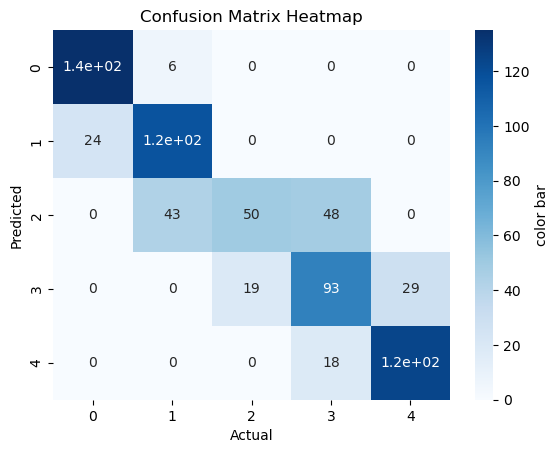

In [36]:
#Plot Heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test_discrete,y_pred),cmap="Blues",annot=True,
           cbar_kws={"label":"color bar"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [37]:
#Evaluating the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test_discrete,y_pred)

0.7351274787535411

In [38]:
#Evaluating the performance of the estimator
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train, y_train_discrete, cv=10)

array([0.76415094, 0.76415094, 0.74528302, 0.77358491, 0.77830189,
       0.77830189, 0.77830189, 0.7535545 , 0.75829384, 0.77251185])

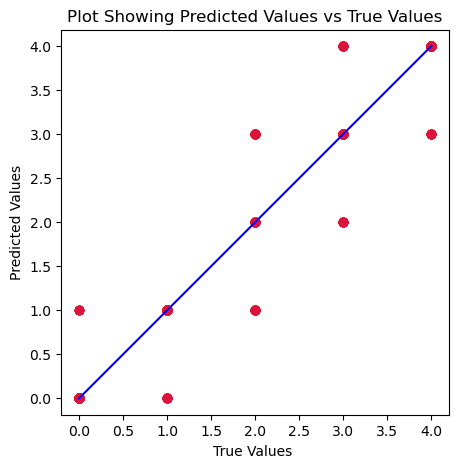

In [39]:
#Visualization of predicted vs true values 
plt.figure(figsize=(5,5))
plt.scatter(y_test_discrete, y_pred, c='crimson')
plt.xlabel('True Values ')
plt.ylabel('Predicted Values')
p1 = max(max(y_pred), max(y_test_discrete))
p2 = min(min(y_pred), min(y_test_discrete))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.axis('equal')
plt.title("Plot Showing Predicted Values vs True Values")
plt.show()

In [40]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test_discrete))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       159
           1       0.83      0.70      0.76       166
           2       0.35      0.72      0.48        69
           3       0.66      0.58      0.62       159
           4       0.87      0.81      0.84       153

    accuracy                           0.74       706
   macro avg       0.73      0.73      0.72       706
weighted avg       0.78      0.74      0.75       706



Text(0, 0.5, 'Features')

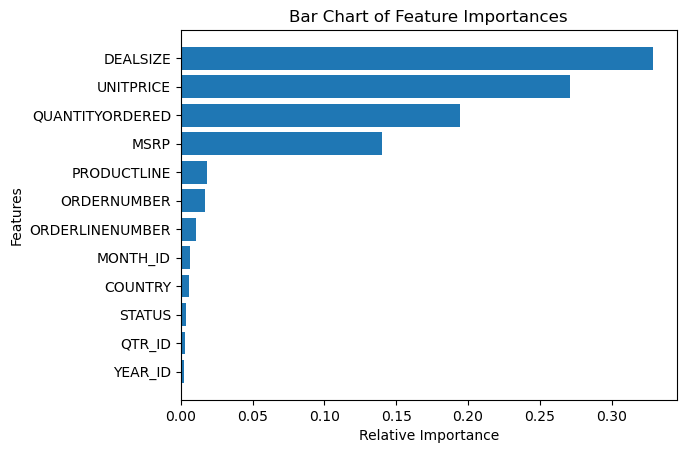

In [41]:
#Plot Bar chart of Feature Importances
features = sales_2_scaled_df.columns
importances = clf.feature_importances_
indices=np.argsort(importances)

plt.title('Bar Chart of Feature Importances')
plt.barh(range(len(indices)), importances[indices],align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])         
plt.xlabel('Relative Importance')
plt.ylabel('Features')

Task 2

Multi-Layer Perceptron Classifier

In [42]:
#Import the MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='logistic')

In [43]:
# Create and train the Multilayer Perceptron (MLP) Classifier
mlp.fit(X_train, y_train_discrete)

D:\Program files 2\ANACONDA3\envs\tensorflow2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 15, 10))

In [44]:
#Testing the model
y_pred = mlp.predict(X_test)

In [45]:
y_pred

array([0, 3, 1, 3, 1, 3, 2, 1, 4, 2, 0, 4, 2, 2, 0, 3, 3, 3, 0, 4, 1, 2,
       3, 0, 2, 3, 4, 2, 3, 2, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 2, 3, 1, 3,
       3, 2, 1, 0, 2, 4, 4, 0, 2, 2, 0, 1, 0, 4, 0, 0, 1, 1, 4, 4, 2, 4,
       4, 4, 3, 0, 0, 0, 0, 3, 4, 1, 2, 2, 3, 3, 2, 0, 2, 0, 4, 2, 3, 0,
       0, 1, 1, 1, 0, 3, 0, 0, 0, 3, 0, 2, 2, 4, 0, 1, 4, 4, 4, 1, 2, 4,
       4, 2, 4, 1, 0, 0, 1, 4, 1, 3, 4, 1, 3, 1, 4, 4, 3, 1, 1, 3, 2, 2,
       2, 0, 4, 0, 2, 3, 4, 3, 2, 1, 4, 4, 0, 3, 4, 3, 0, 4, 1, 4, 0, 0,
       3, 2, 4, 3, 2, 2, 4, 2, 1, 0, 0, 0, 1, 0, 2, 3, 4, 4, 1, 1, 3, 3,
       3, 1, 1, 1, 0, 3, 4, 4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 2, 2, 4,
       0, 3, 4, 2, 1, 0, 4, 3, 0, 4, 3, 0, 4, 4, 0, 1, 4, 4, 4, 4, 4, 2,
       2, 0, 2, 3, 2, 0, 3, 4, 4, 3, 1, 0, 0, 0, 0, 1, 4, 4, 2, 2, 1, 0,
       4, 4, 3, 4, 4, 2, 1, 1, 2, 3, 4, 0, 0, 1, 2, 2, 4, 1, 4, 2, 2, 0,
       0, 1, 2, 1, 1, 3, 0, 2, 0, 4, 0, 4, 2, 4, 0, 4, 1, 2, 2, 0, 4, 2,
       1, 1, 2, 4, 0, 2, 3, 3, 0, 1, 0, 1, 0, 0, 1,

In [46]:
#Evaluating the performance of the classifier
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test_discrete,y_pred)

array([[140,   1,   0,   0,   0],
       [ 32, 102,   7,   0,   0],
       [  0,  24,  97,  20,   0],
       [  0,   0,  22,  85,  34],
       [  0,   0,   1,  22, 119]], dtype=int64)

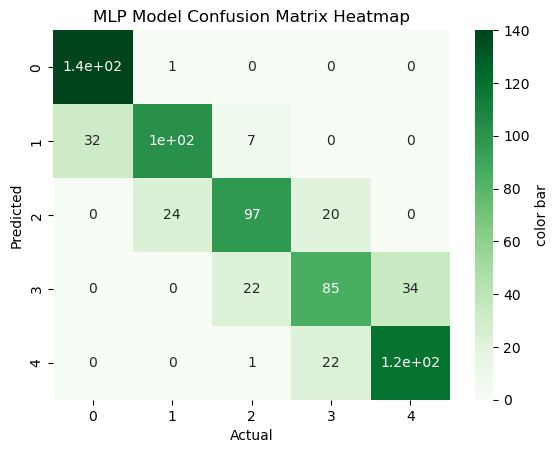

In [48]:
#Plot Heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test_discrete,y_pred),cmap="Greens",annot=True,
           cbar_kws={"label":"color bar"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MLP Model Confusion Matrix Heatmap")
plt.show()

In [49]:
#Evaluating the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test_discrete,y_pred)

0.7691218130311614

In [50]:
#Evaluating the performance of the estimator
from sklearn.model_selection import cross_val_score
cross_val_score(mlp,X_train, y_train_discrete, cv=10)

D:\Program files 2\ANACONDA3\envs\tensorflow2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program files 2\ANACONDA3\envs\tensorflow2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program files 2\ANACONDA3\envs\tensorflow2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program files 2\ANACONDA3\envs\tensorflow2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

array([0.79245283, 0.80188679, 0.80188679, 0.79716981, 0.79716981,
       0.8254717 , 0.78773585, 0.74881517, 0.79620853, 0.77725118])

In [51]:
#MLP Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test_discrete))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       172
           1       0.72      0.80      0.76       127
           2       0.69      0.76      0.72       127
           3       0.60      0.67      0.63       127
           4       0.84      0.78      0.81       153

    accuracy                           0.77       706
   macro avg       0.77      0.77      0.76       706
weighted avg       0.79      0.77      0.77       706



Task 3

Convolutional Neural Network

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
#Build the model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [54]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [55]:
#Fit the model
model.fit(X_train, y_train_discrete, epochs=100, batch_size=32)

Epoch 1/100
67/67 [==============================] - 2s 4ms/step - loss: 1.6207 - accuracy: 0.3444
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 1.0540 - accuracy: 0.5347
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.6528
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.7060 - accuracy: 0.7104
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7374
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.7558
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7638
Epoch 8/100
67/67 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7855
Epoch 9/100
67/67 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7799
Epoch 10/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7931
Epoch 11/

67/67 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9211
Epoch 84/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9183
Epoch 85/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9197
Epoch 86/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9188
Epoch 87/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9192
Epoch 88/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9249
Epoch 89/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9188
Epoch 90/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9164
Epoch 91/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9121
Epoch 92/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9239
Epoch 93/100


In [56]:
#Testing the model
y_pred = model.predict(X_test)

23/23 [==============================] - 0s 3ms/step


In [57]:
#Evaluating the performance of the model
from sklearn.metrics import precision_score

In [58]:
precision_score(y_test_discrete, y_pred, average='weighted')

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

Task 4

KMeans Clustering Technique

In [59]:
#Import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [60]:
#Determine the optimum number of clusters using the elbow method
wcss = []
max_clusters = 10
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init="auto")
    kmeans.fit(sales_2_scaled_df)
    wcss.append(kmeans.inertia_)

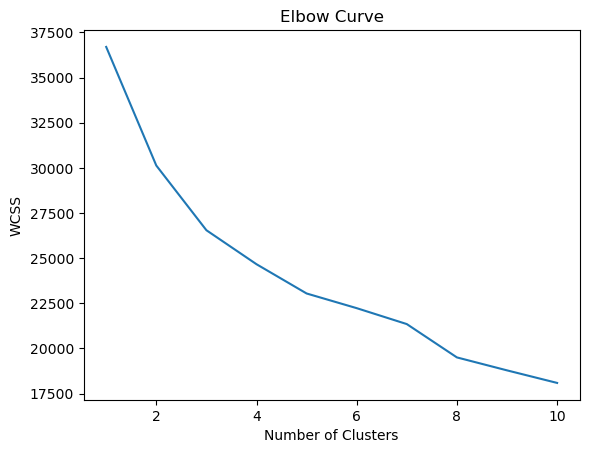

In [61]:
# Plot the Elbow Curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
num_clusters = 8

In [63]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
sales_2_scaled_df_pca = pca.fit_transform(sales_2_scaled_df)

In [64]:
# Add the cluster labels to the reduced data
sales_2_scaled_df_pca_df = pd.DataFrame(sales_2_scaled_df_pca, columns=['PC1', 'PC2'])
sales_2_scaled_df_pca_df['Cluster'] = kmeans.labels_

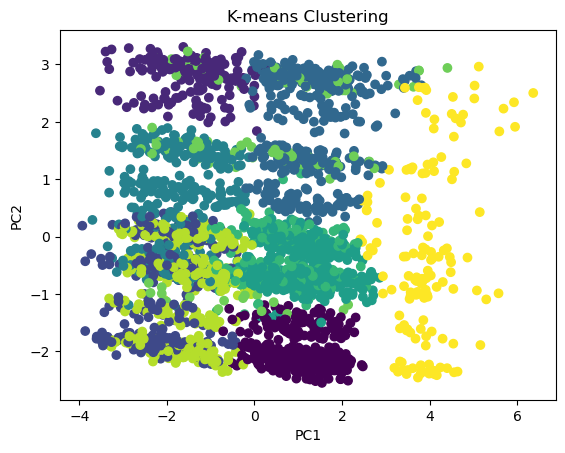

In [65]:
# Plot the clusters
plt.scatter(sales_2_scaled_df_pca_df['PC1'],sales_2_scaled_df_pca_df['PC2'],c=sales_2_scaled_df_pca_df['Cluster'],cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [66]:
# Get the cluster centres for each feature
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [67]:
#Predict the cluster labels for the data
y_kmeans = kmeans.fit_predict(sales_2_scaled_df_pca_df)

In [68]:
y_kmeans

array([2, 1, 0, ..., 6, 7, 7])